# ANOP 330 Final
## Kevin Collier

In [1]:
# import packages
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from dmba import classificationSummary, gainsChart, liftChart
# may have to put this after DMBA import command
%matplotlib inline

no display found. Using non-interactive Agg backend


# Read in Data and look at basic statitics

In [2]:
inventory_df = pd.read_csv("Data/inventory_train.csv")
inventory_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [3]:
# gather basic information on dataset
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360571 entries, 0 to 1360570
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1360571 non-null  int64  
 1   national_inv       1360571 non-null  float64
 2   lead_time          1278182 non-null  float64
 3   in_transit_qty     1360571 non-null  float64
 4   forecast_3_month   1360571 non-null  float64
 5   forecast_6_month   1360571 non-null  float64
 6   forecast_9_month   1360571 non-null  float64
 7   sales_1_month      1360571 non-null  float64
 8   sales_3_month      1360571 non-null  float64
 9   sales_6_month      1360571 non-null  float64
 10  sales_9_month      1360571 non-null  float64
 11  min_bank           1360571 non-null  float64
 12  potential_issue    1360571 non-null  object 
 13  pieces_past_due    1360571 non-null  float64
 14  perf_6_month_avg   1360571 non-null  float64
 15  perf_12_month_avg  1360571 non-n

In [4]:
# look at basic statistics of dataset
inventory_df.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.360571e+06,1.360571e+06,1.278182e+06,1.360571e+06,1.360571e+06,1.360571e+06,1.360571e+06,1.360571e+06,1.360571e+06,1.360571e+06,1.360571e+06,1.360571e+06,1.360571e+06,1.360571e+06,1.360571e+06,1.360571e+06
mean,1.852106e+06,4.837912e+02,7.858978e+00,4.374903e+01,1.780070e+02,3.454916e+02,5.067209e+02,5.517012e+01,1.730748e+02,3.390355e+02,5.240252e+02,5.245381e+01,2.535347e+00,-6.939863e+00,-6.512312e+00,5.250457e-01
std,5.013569e+05,2.806845e+04,7.056853e+00,1.371530e+03,4.933240e+03,9.770796e+03,1.441222e+04,1.959227e+03,5.086128e+03,9.529091e+03,1.485647e+04,1.232674e+03,2.628731e+02,2.666420e+01,2.596508e+01,3.136197e+01
min,1.026827e+06,-2.541400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,1.452832e+06,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.794584e+06,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,2.134726e+06,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00
max,3.284914e+06,1.233440e+07,5.200000e+01,4.894080e+05,1.218328e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.094112e+06,2.146625e+06,3.201035e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


# Data Cleaning

In [5]:
# replace NA values with median
median_leadtime = inventory_df.lead_time.median()
inventory_df.lead_time = inventory_df.lead_time.fillna( value = median_leadtime)

# replace -99 values with NA
inventory_df.perf_6_month_avg = inventory_df.perf_6_month_avg.replace(to_replace = -99.00, value = np.nan)
inventory_df.perf_12_month_avg = inventory_df.perf_12_month_avg.replace(to_replace = -99.00, value = np.nan)

# calculate the median averages
perf_6_median = inventory_df.perf_6_month_avg.median()
perf_12_median = inventory_df.perf_12_month_avg.median()

# fill NA values with median value
inventory_df.perf_6_month_avg = inventory_df.perf_6_month_avg.fillna(perf_6_median)
inventory_df.perf_12_month_avg = inventory_df.perf_6_month_avg.fillna(perf_12_median)

# Change target variable from 'Yes' and 'No' to 1 or 0
inventory_df.went_on_backorder = inventory_df.went_on_backorder.replace(to_replace = "Yes", value = 0)
inventory_df.went_on_backorder = inventory_df.went_on_backorder.replace(to_replace = "No", value = 1)

In [6]:
#Explore the frequence of the target varaible
freq = inventory_df.went_on_backorder.value_counts()
freq/sum(freq)*100

1    99.214447
0     0.785553
Name: went_on_backorder, dtype: float64

## This data is very imbalanced. When creating the models I must take this into account.
## Take a subset of the data to use for the KNN model later on.

In [7]:
# Take a subset of 10% of the data for the KNN model
subset_df = inventory_df.sample(frac=0.1)

# Check that the frequency is similar to the entire data set
freq = subset_df.went_on_backorder.value_counts()
freq/sum(freq)*100

1    99.223855
0     0.776145
Name: went_on_backorder, dtype: float64

# Perform EDA to determine predictors and understand the data

In [8]:
inventory_df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [9]:
# Sepearte the numerical and categorical columns to make EDA easier
quant_cols = ['national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty']
cat_cols = ['potential_issue','deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop']

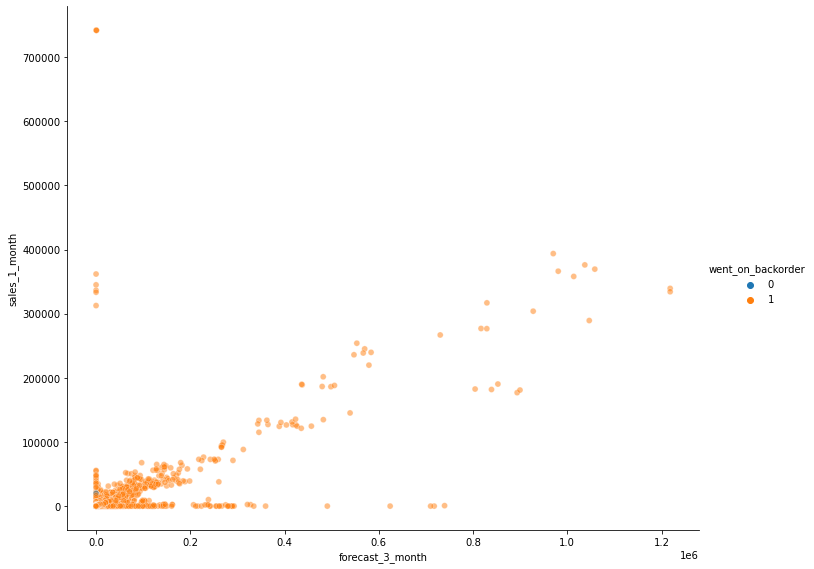

In [12]:
# Create a scatterplot
g = sns.relplot(x='forecast_3_month', y ='sales_1_month', data=inventory_df, hue='went_on_backorder', alpha=0.5, height=8, aspect=10/8)
plt.ticklabel_format(style='plain', axis='y')
plt.show(g)

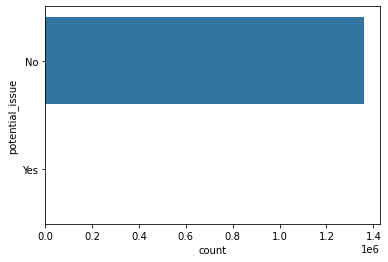

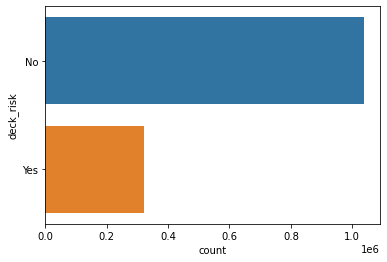

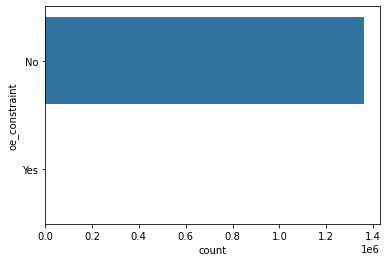

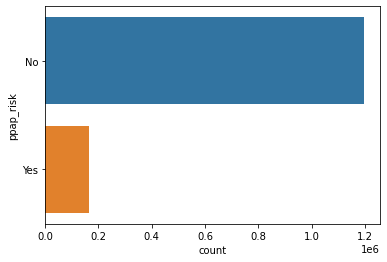

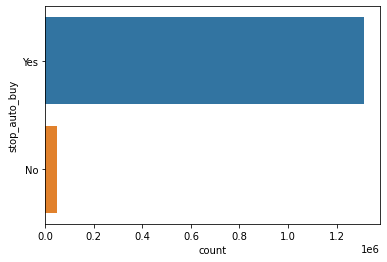

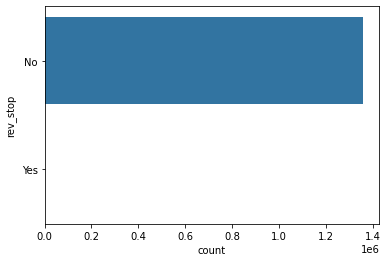

In [13]:
# Look at distribution of categories in cat columns with small numbers of categories
for column in cat_cols:
    if inventory_df[column].nunique() < 10:
        sns.countplot(y=column, data=inventory_df)
        plt.show()

## The fields potential_issue, oe_contraint, and rev_stop are irrelevant. They will not be used as predictors.
## I will us deck_risk, ppapp_risk, stop_auto_buy as categorical predictors.

# To perfrom more EDA, lets standardize the data to look at the distributions of quantative fields

In [14]:
# Standardize the data by rows
scaler = Normalizer()
QtyFields = quant_cols
scaler.fit(inventory_df[QtyFields])
inventory_df[QtyFields] = scaler.transform(inventory_df[QtyFields])

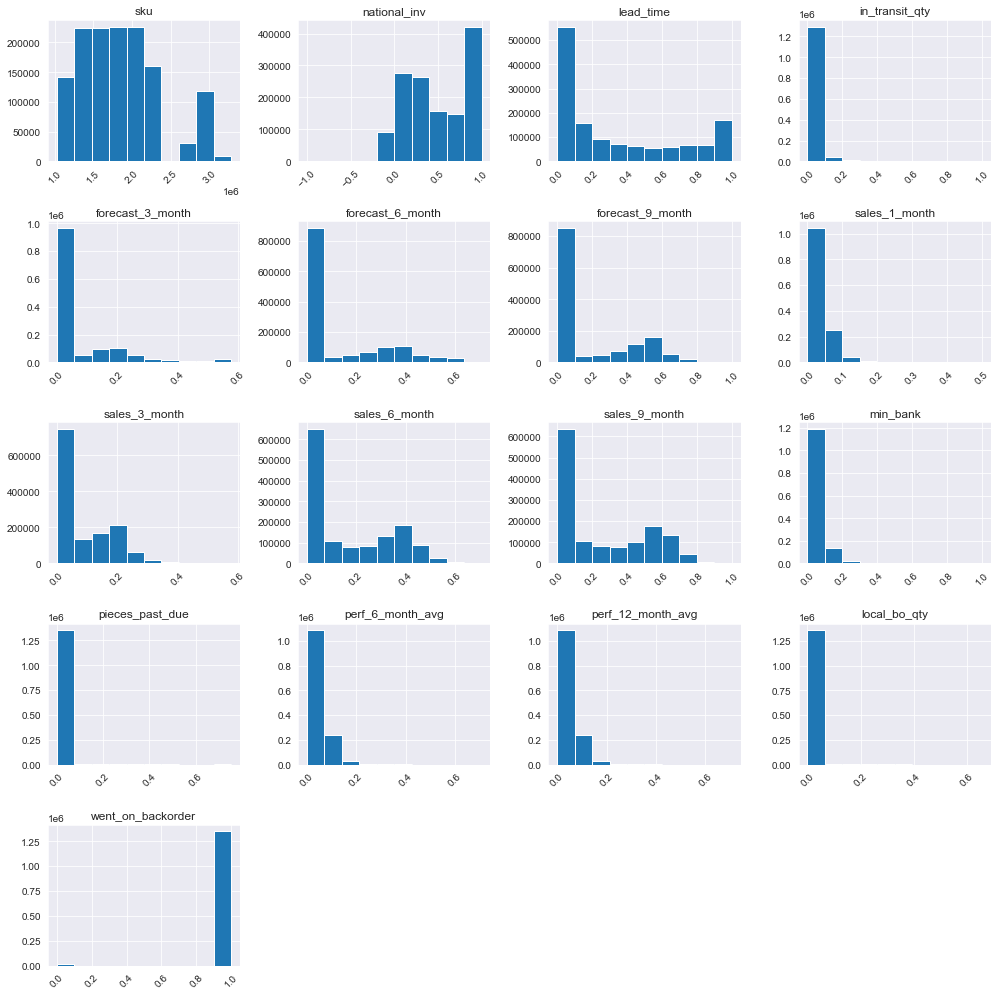

In [15]:
sns.set_style('darkgrid')
inventory_df.hist(figsize=(14,14),xrot=45);
plt.tight_layout()

<AxesSubplot:>

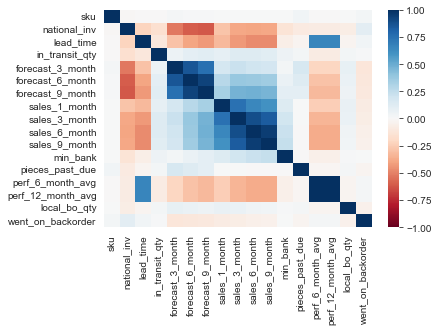

In [16]:
# Make a heatmap to find correlations between variables
corr = inventory_df.corr()
sns.heatmap(corr, xticklabels=corr.columns,
yticklabels=corr.columns, vmin=-1, vmax=1, center=0, cmap="RdBu")

## Let's use national_inv, forecast_3_month, forecast_6_month, forecast_9_month, sale_1_month, sales_3_month, sales_6_month, sales_9_month, min_bank as quantative predictors because there distributions show to have an impact on the data

# Classifier 1: Decision Tree

### Decision Tree's should be made without standardizing the data so lets read in the data again and clean it like we did previously.

In [17]:
inventory_df = pd.read_csv("Data/inventory_train.csv")

# replace NA values with median
median_leadtime = inventory_df.lead_time.median()
inventory_df.lead_time = inventory_df.lead_time.fillna( value = median_leadtime)

# replace -99 values with NA
inventory_df.perf_6_month_avg = inventory_df.perf_6_month_avg.replace(to_replace = -99.00, value = np.nan)
inventory_df.perf_12_month_avg = inventory_df.perf_12_month_avg.replace(to_replace = -99.00, value = np.nan)

# calculate the median averages
perf_6_median = inventory_df.perf_6_month_avg.median()
perf_12_median = inventory_df.perf_12_month_avg.median()

# fill NA values with median value
inventory_df.perf_6_month_avg = inventory_df.perf_6_month_avg.fillna(perf_6_median)
inventory_df.perf_12_month_avg = inventory_df.perf_6_month_avg.fillna(perf_12_median)

# Change target variable from 'Yes' and 'No' to 1 or 0
inventory_df.went_on_backorder = inventory_df.went_on_backorder.replace(to_replace = "Yes", value = 0)
inventory_df.went_on_backorder = inventory_df.went_on_backorder.replace(to_replace = "No", value = 1)

In [18]:
#Set the predictor and outcome fields
predictors = ['national_inv', 'forecast_3_month', 'forecast_6_month', 
              'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 
              'sales_9_month', 'min_bank', 'deck_risk', 'ppap_risk', 'stop_auto_buy']
outcome = 'went_on_backorder'

In [19]:
# Seperate predictor fields into numerical and categorical lists
quant_predictors = ['national_inv', 'forecast_3_month', 'forecast_6_month', 
              'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 
              'sales_9_month', 'min_bank']
cat_predictors = ['deck_risk', 'ppap_risk', 'stop_auto_buy']

In [20]:
# Get dummies for the categorical fields
X = pd.get_dummies(inventory_df[predictors], 
                   columns = cat_predictors, 
                   drop_first = True)

y = inventory_df[outcome]

#split the dataset into training and validation sets
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

## In order to find the best parameters, lets use a grid search to determine the most accurate DT paramters.

In [21]:
dt_param_grid = {
    'max_depth': [4,5,6], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' :[1, 2, 5]
}
dt_gridSearch = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
dt_gridSearch.fit(train_X, train_y)
print('Best Average Score: {:.2f}%'.format(dt_gridSearch.best_score_*100))
print('Best Parameters: ', dt_gridSearch.best_params_)

Best Average Score: 91.67%
Best Parameters:  {'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [22]:
# Look at the perfomance of the grid search
pd.DataFrame.from_dict(dt_gridSearch.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.341740,0.021809,0.111938,0.001017,4,1,2,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.89647,0.900149,0.896969,0.893212,0.893738,0.896108,0.002498,19
1,2.821187,0.655247,0.111271,0.005768,4,1,5,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.89647,0.900149,0.896969,0.893212,0.893738,0.896108,0.002498,19
2,2.038571,0.029889,0.101496,0.013023,4,1,10,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.89647,0.900149,0.896969,0.893212,0.893738,0.896108,0.002498,19
3,2.086425,0.048071,0.106931,0.003088,4,2,2,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.89647,0.900149,0.896969,0.893212,0.893738,0.896108,0.002498,19
4,2.120618,0.034054,0.104474,0.003454,4,2,5,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.89647,0.900149,0.896969,0.893212,0.893738,0.896108,0.002498,19


In [23]:
# Based on the grid search create the model with the best parameters
bestTree = DecisionTreeClassifier(criterion='entropy', max_depth= 6, min_samples_leaf= 5, min_samples_split=2 ,random_state=0)
bestTree.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=0)

In [24]:
#Training vs Validation Data Performance
classificationSummary(train_y, bestTree.predict(train_X))
classificationSummary(valid_y, bestTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9922)

       Prediction
Actual      0      1
     0      5   6400
     1      2 809935
Confusion Matrix (Accuracy 0.9921)

       Prediction
Actual      0      1
     0      1   4282
     1      4 539942


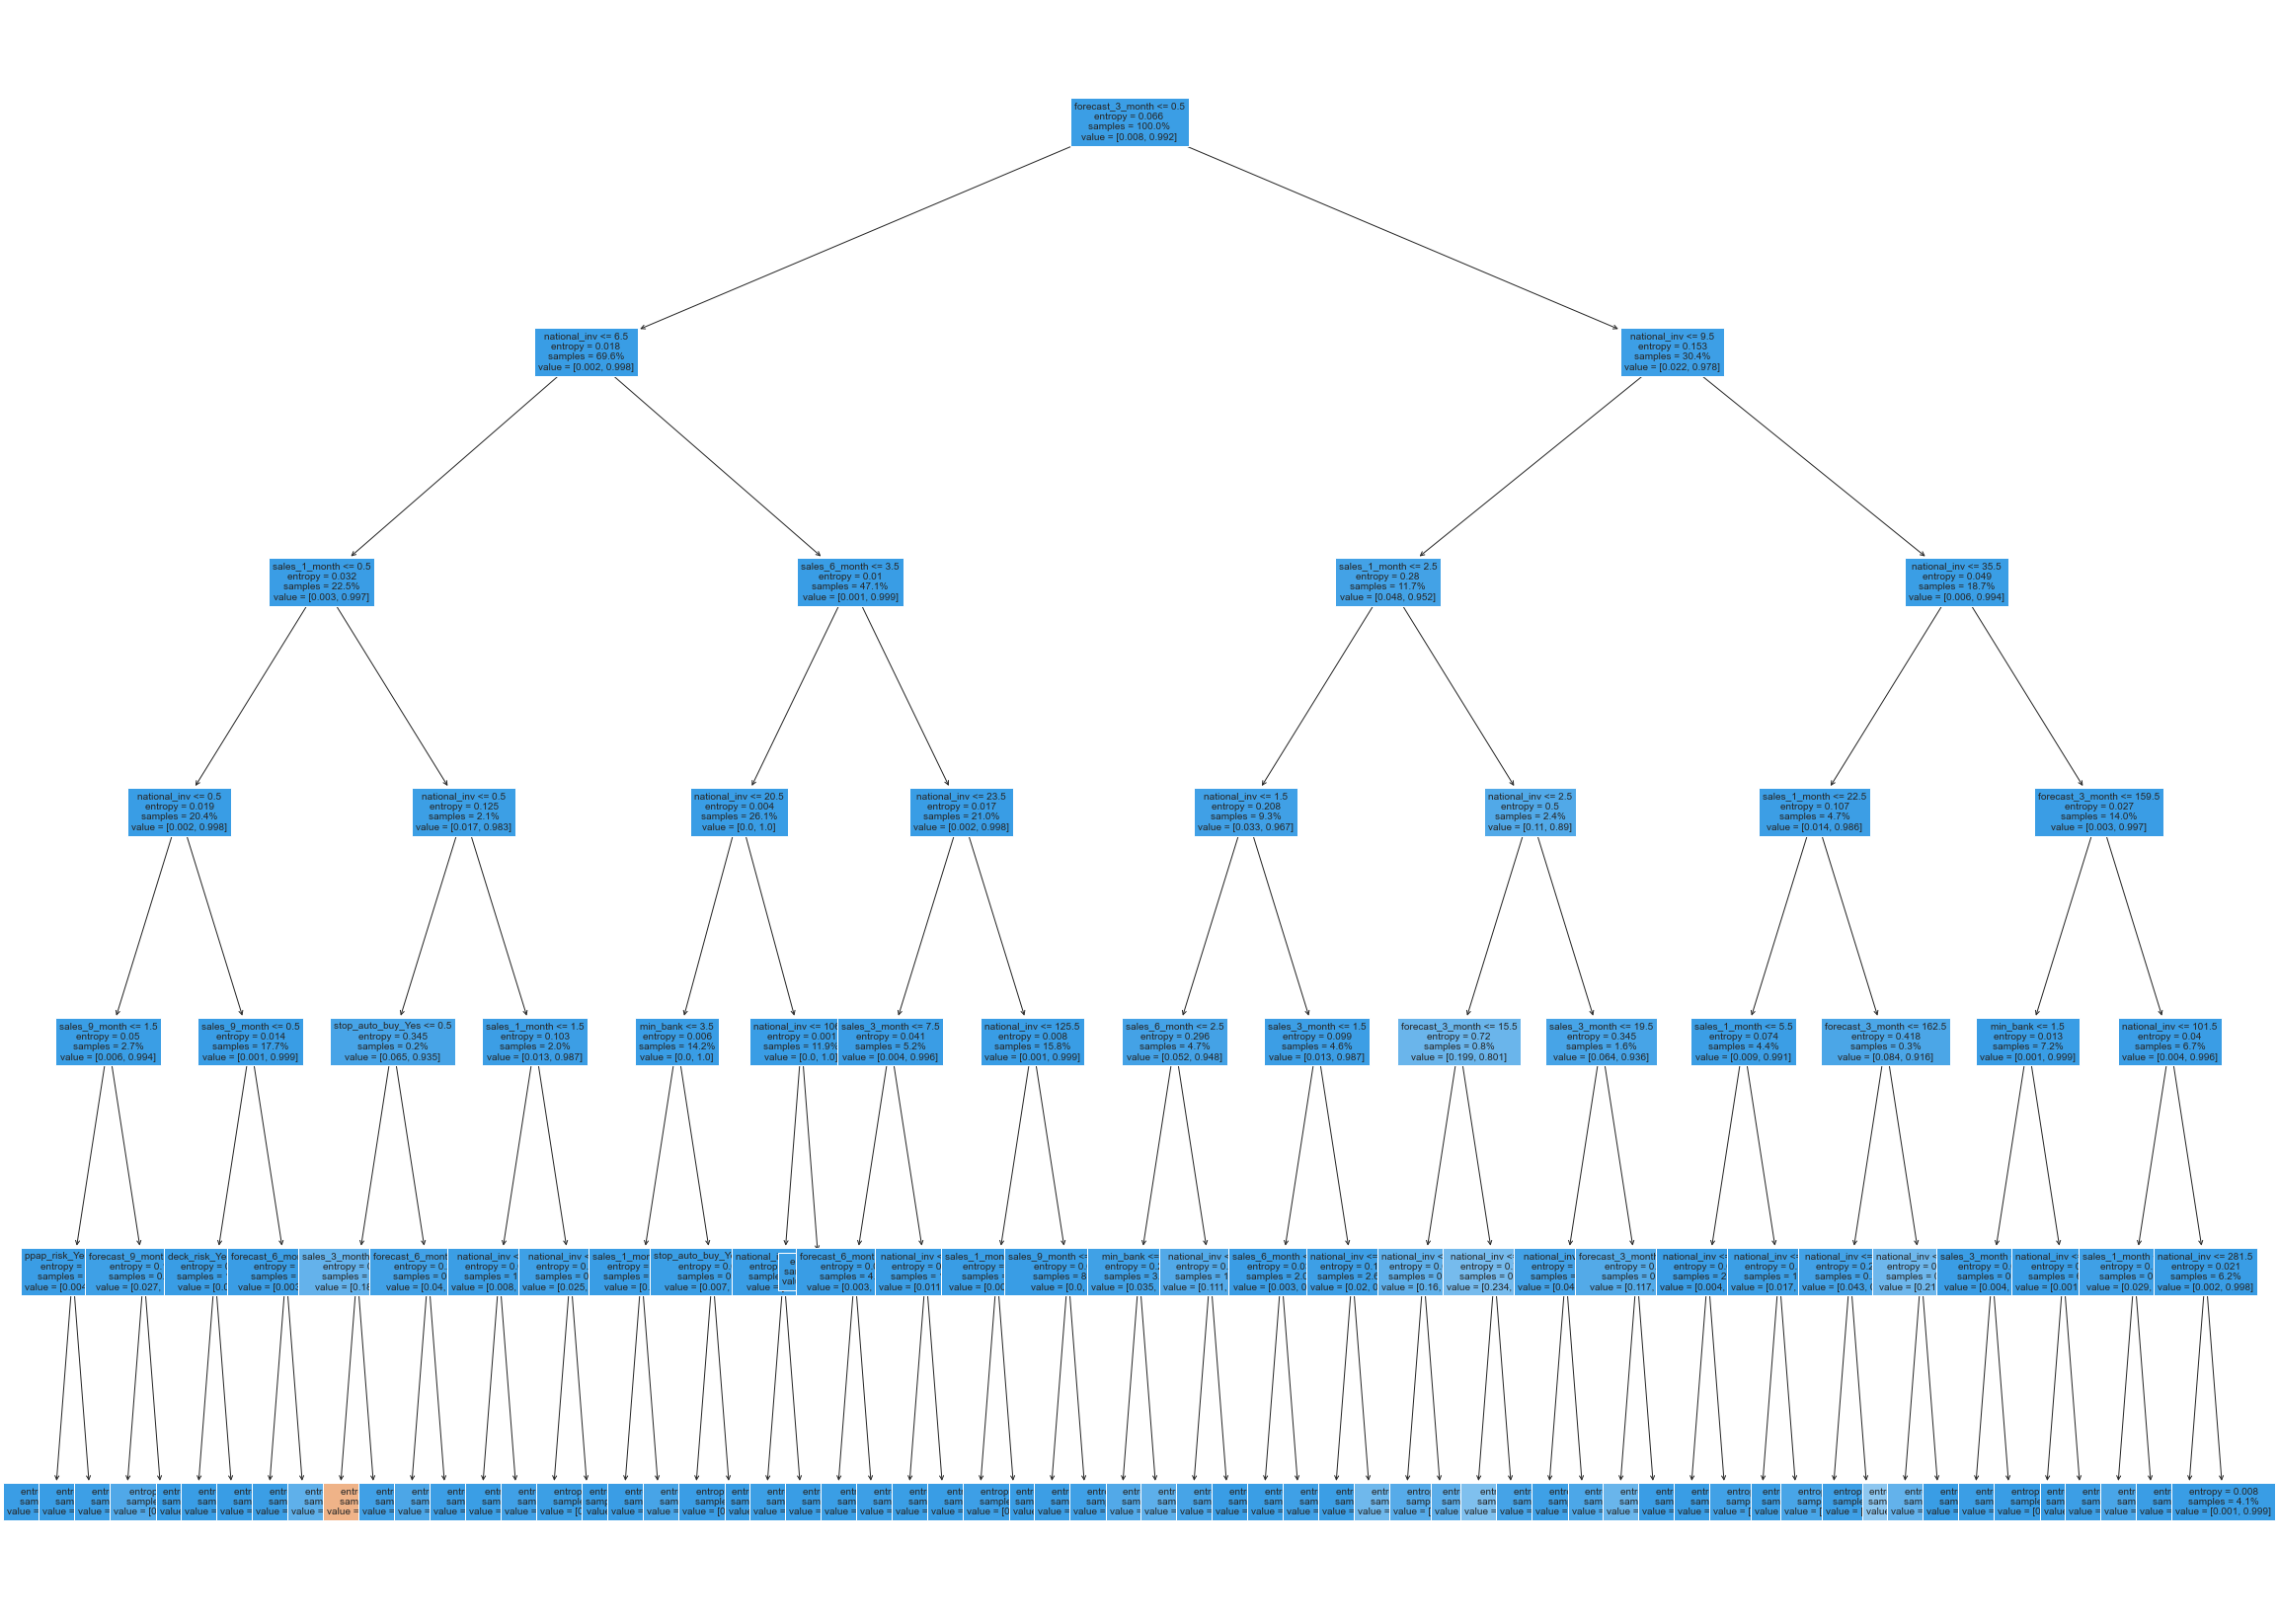

In [25]:
# Display the decision tree
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(bestTree, fontsize = 10, filled=True, feature_names=X.columns, proportion=True)
plt.show()

In [26]:
classTree_proba = bestTree.predict_proba(valid_X)
ct_result1 = pd.DataFrame({'actual': valid_y, 
                             'p(Class = 0)': [p[0] for p in classTree_proba],
                             'p(Class = 1)': [p[1] for p in classTree_proba]})

ct_result1.head()

,actual,p(Class = 0),p(Class = 1)
983487,1,0.000279,0.999721
1023005,1,0.000075,0.999925
359194,1,0.000075,0.999925
992041,1,0.068160,0.931840
917338,1,0.000279,0.999721


In [27]:
# Confusion matrix for the best threshold
THRESHOLD = [.5, .6, .7, .8]

# output formatting
pd.options.display.float_format = '{:,.3f}'.format
np.set_printoptions(precision=3,suppress=True)

# Create dataframe to store resultd
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate (sens)", "true neg rate (spec)", "false pos rate (1-spec)", "precision"])

# Create threshold row
results['THRESHOLD'] = THRESHOLD                                                                         
             
j = 0                                                                                                      

# Iterate over the thresholds
# The model is already fit, so just find the predictions

for i in THRESHOLD:                                                                                                                                                         
    
    # If prob for test set > threshold predict 1
    preds = np.where(bestTree.predict_proba(valid_X)[:,1] > i, 1, 0)                                      
    
    # create confusion matrix (as percentage)
    cm = (confusion_matrix(valid_y, preds,labels=[0, 1], sample_weight=None) / len(valid_y))*100
    
    # OR create confusion matrix as counts
    #cm = confusion_matrix(train_y, preds,labels=[0, 1], sample_weight=None)
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TN = cm[0][0] # True Negatives
    FP = cm[0][1] # False Positives
    FN = cm[1][0] # False Negatives
    TP = cm[1][1] # True Positives
        
    results.iloc[j,1] = accuracy_score(valid_y, preds)
    results.iloc[j,2] = recall_score(valid_y, preds) # Recall is the TPR or sensitivity
    results.iloc[j,3] = TN/(FP+TN) # True negative rate or specificity
    results.iloc[j,4] = FP/(FP+TN) # False positive rate or (1-specificity)
    results.iloc[j,5] = precision_score(valid_y, preds)    
   
    j += 1

print('ALL METRICS')
print( results.T)

Confusion matrix for threshold = 0.5
[[ 0.     0.787]
 [ 0.001 99.212]]
 
Confusion matrix for threshold = 0.6
[[ 0.     0.787]
 [ 0.001 99.212]]
 
Confusion matrix for threshold = 0.7
[[ 0.006  0.781]
 [ 0.019 99.194]]
 
Confusion matrix for threshold = 0.8
[[ 0.122  0.665]
 [ 0.385 98.828]]
 
ALL METRICS
                            0     1     2     3
THRESHOLD               0.500 0.600 0.700 0.800
accuracy                0.992 0.992 0.992 0.989
true pos rate (sens)    1.000 1.000 1.000 0.996
true neg rate (spec)    0.000 0.000 0.008 0.155
false pos rate (1-spec) 1.000 1.000 0.992 0.845
precision               0.992 0.992 0.992 0.993


In [28]:
# Create ROC curve
fpr, tpr, _ = roc_curve(valid_y, bestTree.predict_proba(valid_X)[:,1])
roc_auc = auc(fpr,tpr)

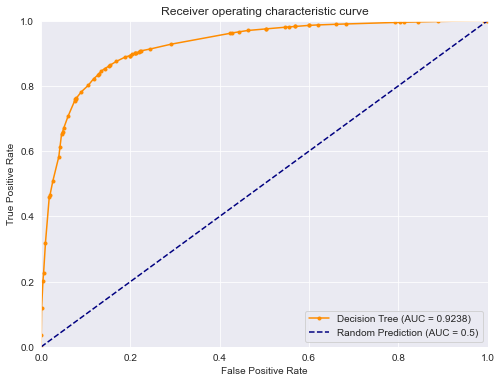

In [29]:
plt.figure(figsize=(8,6))      # format the plot size
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Decision Tree (AUC = {:0.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

# This model performs very well. Its AUC is 92.38%.

## Classifier 2: LOGISTIC REGRESSION

In [30]:
# Use the same predictors as before
predictors = ['national_inv', 'forecast_3_month', 'forecast_6_month', 
              'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 
              'sales_9_month', 'min_bank', 'deck_risk', 'ppap_risk', 'stop_auto_buy']
outcome = 'went_on_backorder'

In [31]:
# Lets standardize the data by rows again
scaler = Normalizer()
QtyFields = quant_predictors
scaler.fit(inventory_df[QtyFields])
inventory_df[QtyFields] = scaler.transform(inventory_df[QtyFields])

In [32]:
# Split the data into the predictors and outcomes
# Get dummie values for the predictors

X = pd.get_dummies(inventory_df[predictors], 
                   drop_first = True)

y = inventory_df[outcome]

In [33]:
#Split the data into training and validation sets
#The training data will be 60% of the data
train_X, valid_X, train_y, valid_y = train_test_split(X,y,train_size=0.6,random_state=1)

In [34]:
# Create the logistic regression model
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')

# Fit the model to the training data set
logit_reg.fit(train_X, train_y)

print('Intercept {:.5f}'.format(logit_reg.intercept_[0]))
print(pd.DataFrame({'Predictor': train_X.columns, 'Coefficient': logit_reg.coef_[0]}),'\n')


Intercept 4.30400
            Predictor  Coefficient
0        national_inv        5.639
1    forecast_3_month       -1.921
2    forecast_6_month       -1.407
3    forecast_9_month        0.281
4       sales_1_month       -4.013
5       sales_3_month       -3.203
6       sales_6_month       -0.301
7       sales_9_month        0.095
8            min_bank        1.357
9       deck_risk_Yes        0.332
10      ppap_risk_Yes       -0.199
11  stop_auto_buy_Yes        0.352 



In [35]:
logit_reg_proba = logit_reg.predict_proba(train_X)
logit_result1 = pd.DataFrame({'Actual Class': train_y, 
                             'p(Class = 0)': [p[0] for p in logit_reg_proba],
                             'p(Class = 1)': [p[1] for p in logit_reg_proba]})
logit_result1.sample(10,random_state=1)

,Actual Class,p(Class = 0),p(Class = 1)
386056,1,0.000,1.000
57499,1,0.000,1.000
1029782,1,0.017,0.983
284618,1,0.013,0.987
99408,1,0.032,0.968
884435,1,0.000,1.000
1178744,1,0.000,1.000
757421,1,0.000,1.000
1290633,1,0.000,1.000
39312,1,0.038,0.962


In [36]:
# Explore differnet cut offs for the data
logit_reg_pred = logit_reg.predict(train_X)
logit_result2 = pd.DataFrame({'Actual Class': train_y, 
                             'p(Class = 0)': [p[0] for p in logit_reg_proba],
                             'p(Class = 1)': [p[1] for p in logit_reg_proba],
                             'Predicted Class (0.5 cutoff)': logit_reg_pred })
logit_result2.sample(10,random_state=1)

,Actual Class,p(Class = 0),p(Class = 1),Predicted Class (0.5 cutoff)
386056,1,0.000,1.000,1
57499,1,0.000,1.000,1
1029782,1,0.017,0.983,1
284618,1,0.013,0.987,1
99408,1,0.032,0.968,1
884435,1,0.000,1.000,1
1178744,1,0.000,1.000,1
757421,1,0.000,1.000,1
1290633,1,0.000,1.000,1
39312,1,0.038,0.962,1


In [37]:
cutoff = 0.8
logit_reg_pred2 = (logit_reg.predict_proba(train_X)[:,1] >= cutoff).astype(int)
logit_result3 = pd.DataFrame({'Actual Class': train_y, 
                             'p(Class = 0)': [p[0] for p in logit_reg_proba],
                             'p(Class = 1)': [p[1] for p in logit_reg_proba],
                             'Predicted Class (0.5 cutoff)': logit_reg_pred,
                             'Predicted Class (0.8 cutoff)': logit_reg_pred2 })
logit_result3.sample(10,random_state=1)

,Actual Class,p(Class = 0),p(Class = 1),Predicted Class (0.5 cutoff),Predicted Class (0.8 cutoff)
386056,1,0.000,1.000,1,1
57499,1,0.000,1.000,1,1
1029782,1,0.017,0.983,1,1
284618,1,0.013,0.987,1,1
99408,1,0.032,0.968,1,1
884435,1,0.000,1.000,1,1
1178744,1,0.000,1.000,1,1
757421,1,0.000,1.000,1,1
1290633,1,0.000,1.000,1,1
39312,1,0.038,0.962,1,1


In [38]:
Cutoff = 0.8
# Need to match how the actual classes are identified. Can use strings as long as they match exactly
class_names = [0, 1]
# list comprehension to classify the records based on the predicted probability AND the 
# cutoff
predicted = [1 if p > Cutoff else 0 for p in logit_reg_proba[:,1]]
classificationSummary(train_y, predicted, class_names=class_names)

Confusion Matrix (Accuracy 0.9915)

       Prediction
Actual      0      1
     0     85   6320
     1    631 809306


The accuracy of this model with the chosen cutoff is: 99.15%
[[    85   6320]
 [   631 809306]]


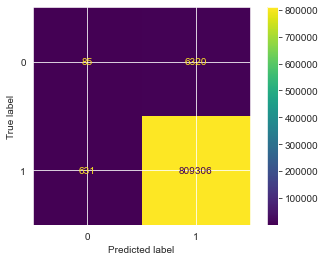

In [39]:
# Accuracy using sklearn
accuracy = accuracy_score(train_y, predicted)
print('The accuracy of this model with the chosen cutoff is: {:.2f}%'.format(accuracy*100))

# Confusion Matrix from sklearn
cm = confusion_matrix(train_y, predicted)
print(cm)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

AUC predictions from logistic regression model = 0.9106


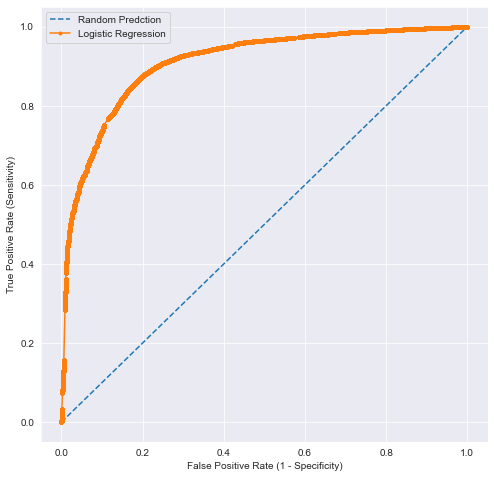

In [40]:
# Calculate the receiver operating curve and the AUC measure
# Build the model - here using the validation data
lr_prob=logit_reg.predict_proba(valid_X)
# Just get the prediction probabilities for Class 1 (target class)
lr_prob=lr_prob[:, 1]
lr_auc=roc_auc_score(valid_y, lr_prob)
print("AUC predictions from logistic regression model = {:.4f}".format(lr_auc))

# the roc_curve function returns a series of false postive rates (x-axis) 
# and a series of true positive rates
# for a series of potential cutoffs (1558 of them in this case!)
# The roc is just the plot of the connected scatterplot of these points
lr_fpr,lr_tpr,_=roc_curve(valid_y,lr_prob)

plt.figure(figsize=[8, 8])
# plot the dotted line that would show a random classifier with 
# AUC of 0.5.
plt.plot([0, 1], [0, 1], linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()

plt.show()

# This model also performs very well. The AUC is 91.06%.

# Classifier 3: KNN

In [41]:
# Use the 10% subset of data for the KNN model
subset_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
548027,1895984,51.000,8.000,0.000,15.000,31.000,55.000,11.000,27.000,54.000,...,0.000,0.860,0.860,0.000,No,No,No,Yes,No,1
471204,1819190,2.000,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.680,0.680,0.000,No,No,No,Yes,No,1
559925,1907883,5.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,...,0.000,0.890,0.890,0.000,No,No,No,Yes,No,1
914050,2262035,42.000,8.000,139.000,205.000,249.000,304.000,52.000,108.000,212.000,...,0.000,0.940,0.940,99.000,No,No,No,Yes,No,1
180178,1291732,4.000,2.000,0.000,3.000,7.000,10.000,1.000,4.000,4.000,...,0.000,0.990,0.990,0.000,Yes,No,No,Yes,No,0


In [42]:
# Standardize the data by rows
scaler = Normalizer()
QtyFields = quant_predictors
scaler.fit(subset_df[QtyFields])
subset_df[QtyFields] = scaler.transform(subset_df[QtyFields])

In [43]:
# split the data into training ad test data sets
# training data will make up 60% of the subset data
train_df, test_df = train_test_split(subset_df, train_size=0.6, random_state=1)

In [44]:
# Split the train_df into our X and y varibles
# get dummies for the categorical predictors
train_X = pd.get_dummies(train_df[predictors], 
                         columns = cat_predictors,  
                         drop_first = True)
train_y = train_df[outcome]

In [45]:
# Standardize the data by features
# This will calculate the standard deviation for every entry
z_scaler = StandardScaler()
z_scaler.fit(train_X)
train_X_std = pd.DataFrame(z_scaler.transform(train_X),columns=train_X.columns,
                           index=train_X.index)

In [46]:
# Perform a grid search to find the best number of neighbors
param_grid = {
    'n_neighbors': [k for k in range(5,20,2)]
}

# Scoring is based off of roc_auc
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1,scoring='roc_auc')

# fit and find the "best" parameters from our data.
gridSearch.fit(train_X_std, train_y)
print('Best (Average) Accuracy: {:.2f}%'.format(gridSearch.best_score_*100))
print('Best Parameter: ', gridSearch.best_params_)

Best (Average) Accuracy: 76.08%
Best Parameter:  {'n_neighbors': 19}


In [47]:
# My choice is to rebuild (fit) the model with ALL the standardized training data and the best found paramters.
k = 19
# 19 neighbors was best, so let's use it!
neigh_class = KNeighborsClassifier(n_neighbors=k)
neigh_class.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=19)

In [48]:
# Repeat the same process for test data
test_X = pd.get_dummies(test_df[predictors], 
                         columns = cat_predictors,  
                         drop_first = True)
test_y = test_df[outcome]

In [49]:
# standardize the features of test data
test_X_std = pd.DataFrame(z_scaler.transform(test_X),columns=test_X.columns,
                           index=test_X.index)

In [50]:
# Classify the test data using our selected KNN model (k=19)!!
# Check the predictions for the training data..meaning compute the actual probabilities using your model!
neigh_class_proba = neigh_class.predict_proba(test_X_std)
neighC_result = pd.DataFrame({'Actual TEST Class': test_y,
                             'p(Class = 1)': [p[1] for p in neigh_class_proba]})
neighC_result.head()

,Actual TEST Class,p(Class = 1)
268987,1,1.000
1277655,1,0.947
61518,1,1.000
460147,1,1.000
1310518,1,0.947


The accuracy of this model with the chosen cutoff is: 97.70%
[[   36   384]
 [  870 53133]]


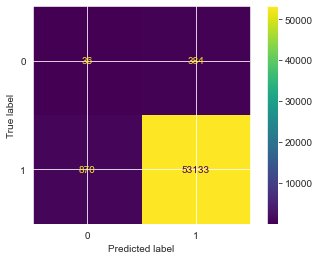

In [51]:
# Let's check the accuracy on the TEST data

pred_probs = neigh_class_proba[:,1]
predicted = [1 if p > 0.8 else 0 for p in pred_probs]

# Accuracy using sklearn for the 0.5 cutoff
accuracy = accuracy_score(test_y, predicted)
print('The accuracy of this model with the chosen cutoff is: {:.2f}%'.format(accuracy*100))

# Confusion Matrix from sklearn
cm = confusion_matrix(test_y, predicted)
print(cm)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

AUC metric using 19-NN model = 0.7593


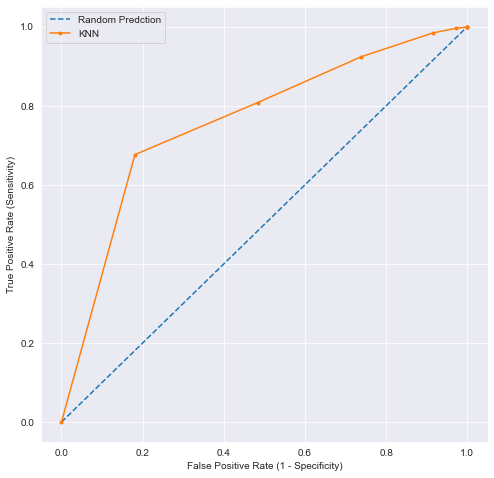

In [52]:
# Calculate the receiver operating curve and the AUC measure
# Build the model - here using the validation data
knn_auc=roc_auc_score(test_y, pred_probs)
print("AUC metric using 19-NN model = {:.4f}".format(knn_auc))

# the roc_curve function returns a series of false postive rates (x-axis) 
# and a series of true positive rates
# for a series of potential cutoffs (1558 of them in this case!)
# The roc is just the plot of the connected scatterplot of these points
knn_fpr,knn_tpr,_= roc_curve(test_y,pred_probs)

plt.figure(figsize=[8, 8])
# plot the dotted line that would show a random classifier with 
# AUC of 0.5.
plt.plot([0, 1], [0, 1], linestyle='--',label='Random Predction')
plt.plot(knn_fpr,knn_tpr,marker='.',label='KNN')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()

plt.show()

# This model did not perform as well as the others. The AUC for ROC is 70.38%.

# Create Predictions on Test Data
## Perform the same data cleaning as we did on the training data

In [53]:
inventory_test_df = pd.read_csv("Data/inventory_test.csv")
inventory_test_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,3285085,62,NaN,0,0,0,0,0,0,0,...,No,0,-99.000,-99.000,0,Yes,No,No,Yes,No
1,3285131,9,NaN,0,0,0,0,0,0,0,...,No,0,-99.000,-99.000,0,No,No,Yes,No,No
2,3285358,17,8.000,0,0,0,0,0,0,0,...,No,0,0.920,0.950,0,No,No,No,Yes,No
3,3285517,9,2.000,0,0,0,0,0,0,0,...,No,0,0.780,0.750,0,No,No,Yes,Yes,No
4,3285608,2,8.000,0,0,0,0,0,0,0,...,No,0,0.540,0.710,0,No,No,No,Yes,No


In [54]:
# replace NA values with median
median_leadtime_test = inventory_test_df.lead_time.median()
inventory_test_df.lead_time = inventory_test_df.lead_time.fillna( value = median_leadtime_test)

# replace -99 values with NA
inventory_test_df.perf_6_month_avg = inventory_test_df.perf_6_month_avg.replace(to_replace = -99.00, value = np.nan)
inventory_test_df.perf_12_month_avg = inventory_test_df.perf_12_month_avg.replace(to_replace = -99.00, value = np.nan)

# calculate the median averages
perf_6_median_test = inventory_test_df.perf_6_month_avg.median()
perf_12_median_test = inventory_test_df.perf_12_month_avg.median()

# fill NA values with median value
inventory_test_df.perf_6_month_avg = inventory_test_df.perf_6_month_avg.fillna(perf_6_median_test)
inventory_test_df.perf_12_month_avg = inventory_test_df.perf_6_month_avg.fillna(perf_12_median_test)

# Add target variable column to test data frame
inventory_test_df['went_on_backorder'] = 0

In [55]:
# Get dummies for teh predictions
prediction_df = pd.get_dummies(inventory_test_df[predictors], drop_first = True)

In [56]:
# Prediction Values for Decision Tree Model
submit_DT_df = pd.DataFrame(columns = ['sku', 'propensity'])
submit_DT_df["sku"] = inventory_test_df["sku"]

submit_DT_df['propensity'] = bestTree.predict_proba(prediction_df)
# submit_DT_df['propensity'].hist()

In [57]:
# Prediction Values for Logistic Regression Model
submit_log_df = pd.DataFrame(columns = ['sku', 'propensity'])
submit_log_df["sku"] = inventory_test_df["sku"]

submit_log_df['propensity'] = logit_reg.predict_proba(prediction_df)
# submit_log_df['propensity'].hist()

In [58]:
# Prediction Values for KNN Model
submit_KNN_df = pd.DataFrame(columns = ['sku', 'propensity'])
submit_KNN_df["sku"] = inventory_test_df["sku"]

submit_KNN_df['propensity'] = neigh_class.predict_proba(prediction_df)
# submit_KNN_df['propensity'].hist()

In [60]:
# #Submit prediction propensity file
# submit_KNN_df.to_csv("Final KNN Attempt.csv",index=False)

# Model Analysis and Evaluation
## Classifier 1: Decision Tree performed the best
### Let's sort the data and find which items are most likely to be backordered

In [64]:
top_50 = submit_DT_df.sort_values(by = 'propensity',
                        ascending = False).head(50)

In [65]:
#top_50['sku'].to_list()

# Although I can't fully predict if these items will be back ordered, these are the top 50 items that are most likely to be backordered based on my model.